In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import json
import matplotlib.pyplot as plt

In [ ]:
# read in our balanced version of the covidx data
full_df = pd.read_csv('balanced_covidx_data.csv')
display(full_df)

# filter covidx for only rsna sourced cases
covidx_rsna = full_df[full_df['source']=='rsna']
display(covidx_rsna)

,Unnamed: 0,Unnamed: 0.1,patientid,img,finding,source,split
0,0,0,3,SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....,pneumonia,cohen,train
1,1,1,3,SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....,pneumonia,cohen,train
2,2,2,3,SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...,pneumonia,cohen,train
3,3,3,7,SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...,pneumonia,cohen,train
4,4,4,7,SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day...,pneumonia,cohen,train
...,...,...,...,...,...,...,...
12807,1548,1548,2c917d3a-95cb-4c11-802c-f83e28cb37bc,2c917d3a-95cb-4c11-802c-f83e28cb37bc.png,pneumonia,rsna,test
12808,1549,1549,3040d9d7-d895-453f-887c-616c10531960,3040d9d7-d895-453f-887c-616c10531960.png,pneumonia,rsna,test
12809,1550,1550,c07f52df-d481-434f-84c1-04263926ac40,c07f52df-d481-434f-84c1-04263926ac40.png,pneumonia,rsna,test
12810,1551,1551,c109061a-d815-4cae-8343-9230d8024adf,c109061a-d815-4cae-8343-9230d8024adf.png,pneumonia,rsna,test


,Unnamed: 0,Unnamed: 0.1,patientid,img,finding,source,split
3790,3806,3806,009eb222-eabc-4150-8121-d5a6d06b8ebf,009eb222-eabc-4150-8121-d5a6d06b8ebf.png,normal,rsna,train
3791,3807,3807,01027bc3-dc40-4165-a6c3-d6be2cb7ca34,01027bc3-dc40-4165-a6c3-d6be2cb7ca34.png,normal,rsna,train
3792,3809,3809,019ca122-9cdf-4704-b7a9-449c8a1c263e,019ca122-9cdf-4704-b7a9-449c8a1c263e.png,normal,rsna,train
3793,3810,3810,01a4059c-22f7-4f51-8a27-50aff0b3aeb3,01a4059c-22f7-4f51-8a27-50aff0b3aeb3.png,normal,rsna,train
3794,3815,3815,01cc7c75-4498-43ab-b650-5553d0507f76,01cc7c75-4498-43ab-b650-5553d0507f76.png,normal,rsna,train
...,...,...,...,...,...,...,...
12807,1548,1548,2c917d3a-95cb-4c11-802c-f83e28cb37bc,2c917d3a-95cb-4c11-802c-f83e28cb37bc.png,pneumonia,rsna,test
12808,1549,1549,3040d9d7-d895-453f-887c-616c10531960,3040d9d7-d895-453f-887c-616c10531960.png,pneumonia,rsna,test
12809,1550,1550,c07f52df-d481-434f-84c1-04263926ac40,c07f52df-d481-434f-84c1-04263926ac40.png,pneumonia,rsna,test
12810,1551,1551,c109061a-d815-4cae-8343-9230d8024adf,c109061a-d815-4cae-8343-9230d8024adf.png,pneumonia,rsna,test


In [1]:
# read in rsna mapping from original NIH dataset
with open('pneumonia-challenge-dataset-mappings_2018.json') as f:
  data = json.load(f)

data = pd.DataFrame(data)

# merge datasets on patient id
rsna_df_merged = pd.merge(data, covidx_rsna, left_on = 'subset_img_id', right_on='patientid')
print(len(data) - len(rsna_df_merged)) # confirm successful merge

# identify rsna sourced pneumonia cases in covidx
rsna_pneumonia = rsna_df_merged[rsna_df_merged['finding']=='pneumonia'] 
print(rsna_pneumonia.orig_labels.value_counts()) # print the rsna pneumonia cases' original labels

# some patients original label is a list of multiple pathologies
ls = rsna_pneumonia.orig_labels.values 

# flatten list of pathologies
flat_list = [item for sublist in ls for item in sublist] 

# count pathologies in the original labels
counts = []
pathologies = []
for i in set(flat_list):
  counts.append(flat_list.count(i))
  pathologies.append(i)

NameError: name 'pd' is not defined

In [ ]:
# create dataframe of original pathology and associated count
pathology_df = pd.DataFrame({'Count':counts, 'Pathology':pathologies})
pathology_df = pathology_df.sort_values('Count', ascending=False)
print(pathology_df)

# filter to include only the top 10 most frequent pathologies
pathology_df = pathology_df[pathology_df['Count']>300] 

sns.barplot(x='Pathology', y='Count', data=pathology_df)
plt.xticks(rotation=45)
plt.title('Frequency of alternative pathologies')

In [ ]:
orig_lab_pneumonia = pd.DataFrame()
for col, row in rsna_pneumonia.iterrows():
  if 'Pneumonia' in row['orig_labels']:
    orig_lab_pneumonia = orig_lab_pneumonia.append(row)
 

print('number of cases originally labelled pneum - ', len(orig_lab_pneumonia))
print('number of rsna cases considered pneum by covidx',len(rsna_pneumonia))

perc_res = 100*len(orig_lab_pneumonia)/len(rsna_pneumonia)
print('percentage of actual pneum cases within covidx rsna data', perc_res)

rsna_normal = rsna_df_merged[rsna_df_merged['finding']=='normal'] 

normal       4638
pneumonia    4347
COVID-19     3827
Name: finding, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  app.launch_new_instance()


,Source,Finding,Count,percentage
0,ACTMED,COVID-19,58,0.452701
1,CHOWDHURY,COVID-19,3434,26.802997
2,COHEN,COVID-19,300,2.341555
3,COHEN,pneumonia,42,0.327818
4,FIG1,COVID-19,35,0.273181
5,RSNA,normal,4638,36.200437
6,RSNA,pneumonia,4305,33.601311


Text(0.5, 1.0, 'Frequency of COVIDx data')

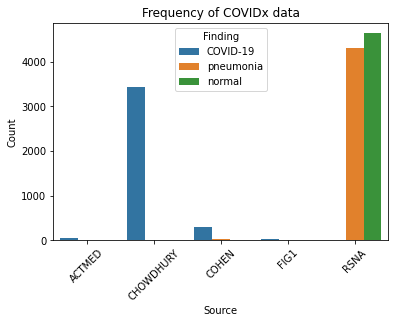

In [ ]:
# analysis of full balanced covidx dataset
print(full_df['finding'].value_counts())

# map source names to be consistent with how the sources are referenced in our paper
source_map = {'fig1':'FIG1', 'rsna': 'RSNA', 'sirm':'CHOWDHURY', 'cohen':'COHEN','actmed':'ACTMED'}
full_df['Source'] = full_df['source'].map(source_map)

full_df['Finding'] = full_df['finding']

# groupby data by source and finding - count instances in these groups
x = full_df.groupby(['Source','Finding']).size().to_frame('Count').reset_index()

# calculate counts as percentage proportion of overall dataset
x['Percentage'] = pd.Series()
for idx, row in x.iterrows():
  x.at[idx, 'Percentage'] = 100*row['Count']/np.sum(x['Count'].values)
display(x)

# create plot of counts
plt.xticks(rotation=45)
sns.barplot(x='Source', y='Count', hue='Finding', data=x).set_title('Frequency of COVIDx data')